## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

According to me it will be correct to choose predictive model as analytical approach. As we have huge amount of past data to find patterns and determine relation between them. Also models can be trained and accuracy can be increased to predict the target variable i.e red wine quality.


### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

For determining the red wine quality we need to consider the sample data on amount of alcohol,pH level, density, acidity and sulphates in wine based on which quality of the red wine is classified.

### Data Collection

**Q3. From where do we get our data?**

Red wine data set is available on the UCI machine learning repository(https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). 

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Red wine data set is available on the UCI machine learning repository(https://archive.ics.uci.edu/ml/datasets/wine+quality). Dataset of the red wine samples is from the north of portugal based on physicochemical test. Data set consist of total 12 vaiables.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Knowing the impact of each variable on the red wine quality help business in the red wine industry better assess their production, distribution, and pricing stratergy.



In [345]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

redwine_dataset = pd.read_csv('winequality-red.csv')
redwine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<li>Check the shape of data, and the datatypes of the features</li>

In [346]:
redwine_dataset.shape

(1599, 12)

<li>Understand the data by carrying out any steps that you think are necessary</li>

In [347]:
redwine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [348]:
redwine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [349]:
redwine_dataset.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>


In [350]:
redwine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<li>Check for outliers if any and handle them</li>


In [351]:
Q1 = redwine_dataset.quantile(0.25)
Q2 = redwine_dataset.quantile(0.75)
IQR = Q2 - Q1

In [352]:
print((redwine_dataset < (Q1 - 1.5 * IQR)) | (redwine_dataset > (Q2 + 1.5 * IQR)))


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

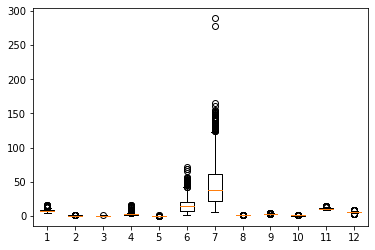

In [353]:
plt.boxplot(redwine_dataset)
plt.show()

(1179, 12)


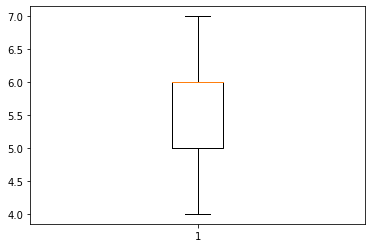

In [354]:
redwine_dataset_filtered = redwine_dataset[~((redwine_dataset < (Q1 - 1.5 * IQR)) | (redwine_dataset > (Q2 + 1.5 * IQR))).any(axis=1)]
print(redwine_dataset_filtered.shape)
plt.boxplot(redwine_dataset_filtered["quality"])
plt.show()

In [355]:
redwine_dataset_filtered.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<li>Implement Correlation heatmap</li>


<AxesSubplot:>

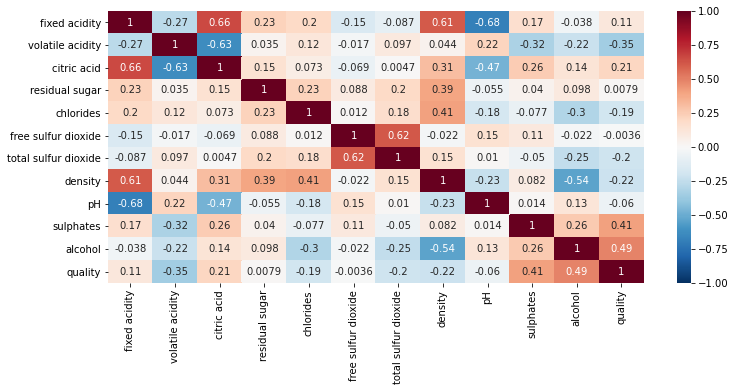

In [356]:
correlation = redwine_dataset_filtered.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [357]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.492551
sulphates               0.413533
citric acid             0.212133
fixed acidity           0.113422
residual sugar          0.007934
free sulfur dioxide    -0.003609
pH                     -0.060288
chlorides              -0.190869
total sulfur dioxide   -0.203374
density                -0.215375
volatile acidity       -0.346962
Name: quality, dtype: float64

<li>Check the distribution of data using histograms</li>


(array([ 33.,   0.,   0., 513.,   0.,   0., 498.,   0.,   0., 135.]),
 array([4. , 4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <BarContainer object of 10 artists>)

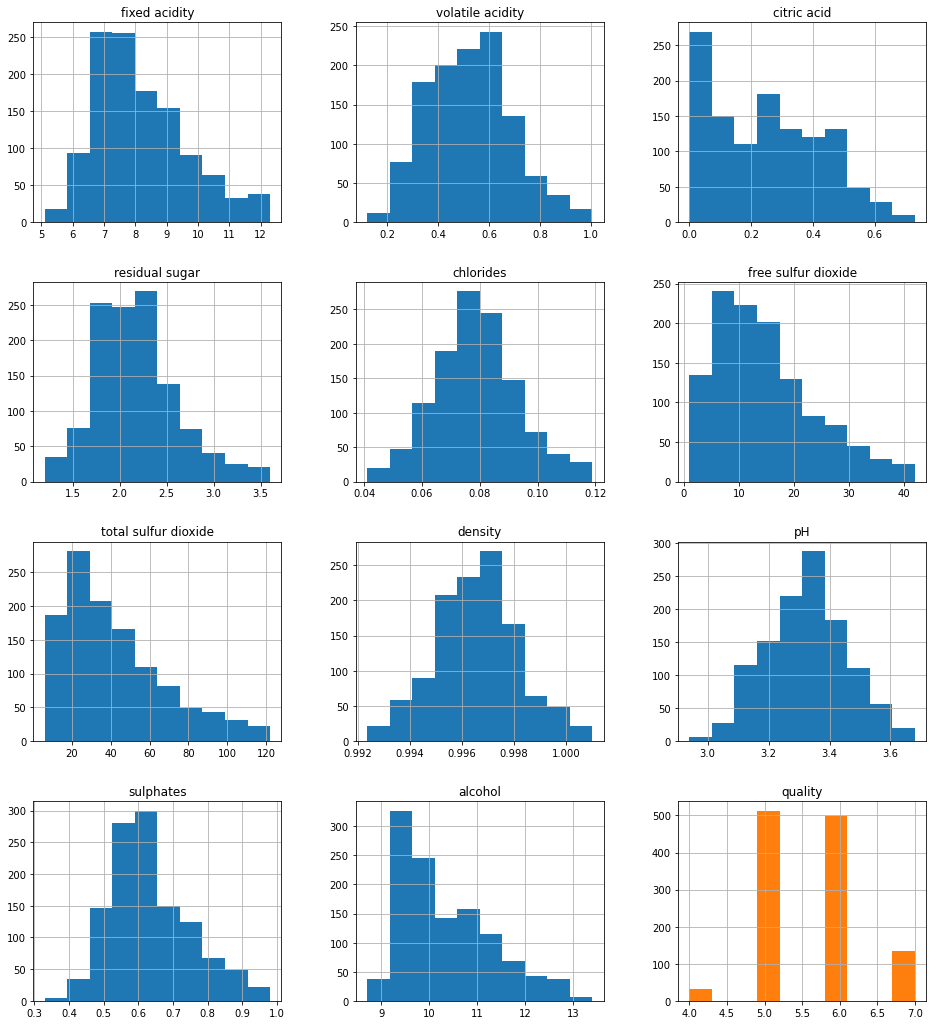

In [358]:
redwine_dataset_filtered.hist( figsize = (16,18))
plt.hist(x=redwine_dataset_filtered['quality'],bins =10)



<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [359]:
features = redwine_dataset_filtered.drop('quality',axis=1)
labels = redwine_dataset_filtered['quality']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42 )

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
1. RandomForestRegressor
2. LinearRegression

In [360]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [361]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train.values.ravel())

model2 = linear_model.LinearRegression()
model2.fit(X_train, y_train.values.ravel())

LinearRegression()

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>


In [362]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [363]:
y_pred = model1.predict(X_test)
print('RandomForestRegressor: R-squared: {} / RMSE: {} / MAE: {}'.format(r2_score(y_test,y_pred),
                                                  mean_squared_error(y_test, y_pred,squared=False),
                                                  mean_absolute_error(y_test, y_pred)))

RandomForestRegressor: R-squared: 0.39093701455075813 / RMSE: 0.5678124839673327 / MAE: 0.4283474576271187


In [364]:
y_pred = model2.predict(X_test)
print('LinearRegression: R-squared: {} / RMSE: {} / MAE: {}'.format(r2_score(y_test,y_pred),
                                                  mean_squared_error(y_test, y_pred,squared=False),
                                                  mean_absolute_error(y_test, y_pred)))

LinearRegression: R-squared: 0.37182494405568456 / RMSE: 0.5766524968273447 / MAE: 0.4526858736243114


<li>Compare these 3 metrics for the two models and analyze the performance</li>


Out of the two models RandomForestRegressor model performance better in predicting red wine quality with decent R-Squared value 39.09% and comparably lower Error values (RMSE,MAE).

<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

Feature: 0, Score: 0.06088
Feature: 1, Score: 0.10172
Feature: 2, Score: 0.05441
Feature: 3, Score: 0.04449
Feature: 4, Score: 0.07142
Feature: 5, Score: 0.04540
Feature: 6, Score: 0.07103
Feature: 7, Score: 0.05503
Feature: 8, Score: 0.05331
Feature: 9, Score: 0.15265
Feature: 10, Score: 0.28968


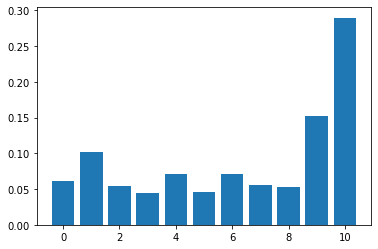

In [365]:
importance = model1.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.04147
Feature: 1, Score: -0.85036
Feature: 2, Score: -0.51075
Feature: 3, Score: -0.02234
Feature: 4, Score: -1.60082
Feature: 5, Score: 0.00212
Feature: 6, Score: -0.00224
Feature: 7, Score: -5.50639
Feature: 8, Score: -0.37736
Feature: 9, Score: 1.68512
Feature: 10, Score: 0.27818


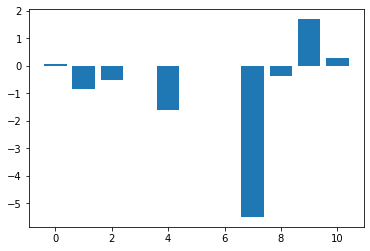

In [366]:
importance = model2.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Conclusion

By analyzing the test samples data of red wine from portugal, I was able to Implement Multivariable Linear Regression using regression algorithm to create two models(Linear regression & RandomForestRegressor) to predict the wine quality. From which model2 i.e RandomForestRegressor model was found out to be best with R-square value 39.09%.